In [1]:
%matplotlib inline
# import mpld3
# mpld3.enable_notebook()

%load_ext autoreload

In [2]:
import sys
sys.path.insert(0, "../")

import pickle
import math as m
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from experiment_utils import plot_history
from rotation_rate_utils import plot_parameter_distances

/home/sicarbonnell/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
with open('results/relative_lr_results.p','rb') as f:
    results = pickle.load(f)

In [4]:
matplotlib.rcParams.update({'font.size': 16})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

label = {'SGD':'SGD','llc':'Layca'}

def make_plot(task, results, legend = True):
    for i,optimizer in enumerate(sorted(results[task].keys())):
        if optimizer not in ['normalized']:
            alphas = sorted(results[task][optimizer].keys(), reverse=True)

            if task == 'tinyImagenet':
                test_accs = [results[task][optimizer][alpha]['test_performance'][1] for alpha in alphas]
            else:
                test_accs = [results[task][optimizer][alpha]['history']['history']['val_acc'][-1] for alpha in alphas]
            train_accs = [results[task][optimizer][alpha]['history']['history']['acc'][-1] for alpha in alphas]
            
            filtered_test_accs = []
            filtered_alphas = []
            filtered_train_accs = []
            for j,train_acc in enumerate(train_accs):
                if train_acc >0.98:
                    filtered_test_accs.append(test_accs[j]) 
                    filtered_train_accs.append(train_acc) 
                    filtered_alphas.append(alphas[j])
            
            plt.plot(filtered_alphas,filtered_test_accs, 'C'+str(i),label = label[optimizer])
            plt.plot(filtered_alphas,filtered_test_accs, 'C'+str(i)+'.', ms = 15)
#             plt.plot(filtered_alphas,filtered_train_accs, 'C'+str(i)+'--')
#             plt.plot(filtered_alphas,filtered_train_accs, 'C'+str(i)+'.')
    plt.xlabel(r'$\alpha$',fontsize=25)
    plt.ylabel('Test accuracy',fontsize=18)
    plt.xticks(np.arange(min(filtered_alphas),max(filtered_alphas)+0.01, step=0.2))
    if legend:
        plt.legend(fontsize=20)
    plt.tight_layout()

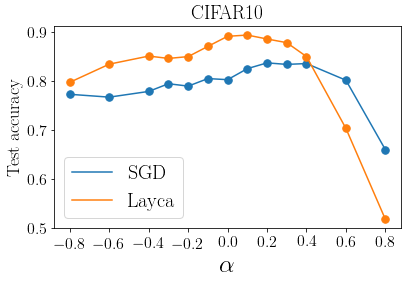

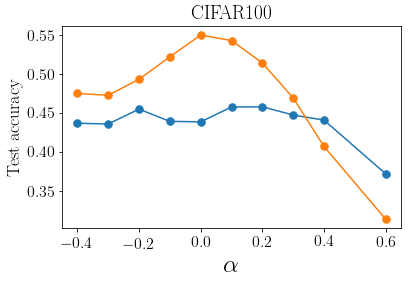

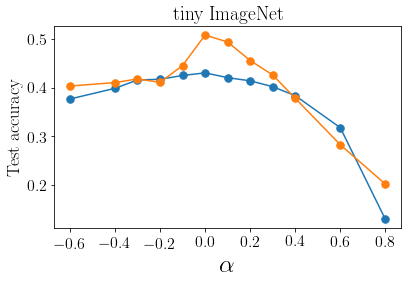

In [5]:
title = {'cifar10':'CIFAR10','cifar100':'CIFAR100','tinyImagenet':'tiny ImageNet'}
for i,task in enumerate(['cifar10', 'cifar100', 'tinyImagenet']):
    plt.figure()
    make_plot(task, results,legend = i==0)
    plt.title(title[task])
    plt.savefig('figures/relative_'+task+'.eps',format='eps', dpi=200)
#     plt.savefig('figures/relative_'+task+'.png',format='png', dpi=300)

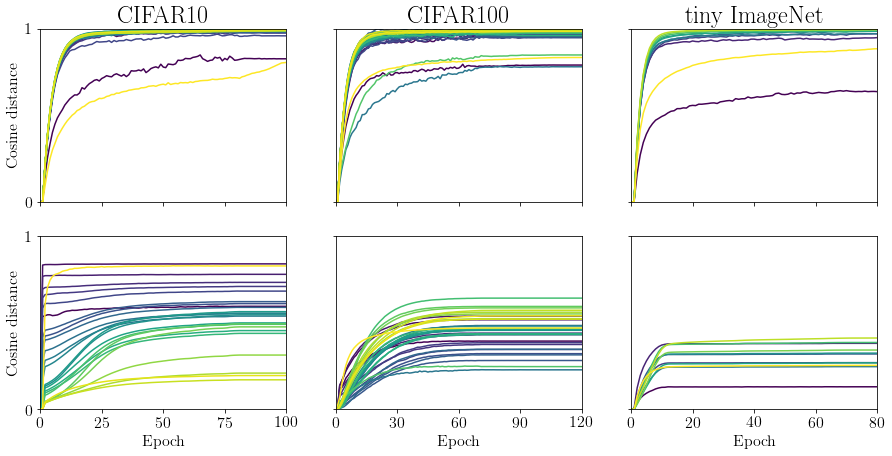

In [6]:
f, axes = plt.subplots(2, 3, figsize = (15,7), sharey = True, sharex = 'col')
title = {'cifar10':'CIFAR10','cifar100':'CIFAR100','tinyImagenet':'tiny ImageNet'}
for i,task in enumerate(['cifar10','cifar100','tinyImagenet']):
    plot_parameter_distances(results[task]['llc'][0.]['lpdm'], ax = axes[0,i])
    axes[0,i].set_title(title[task])
    if i>0:
        axes[0,i].set_ylabel('')
    axes[0,i].set_xlabel('')
    
    plot_parameter_distances(results[task]['SGD'][0.]['lpdm'], ax = axes[1,i])
    if i>0:
        axes[1,i].set_ylabel('')
    if i==1:
        axes[1,i].set_xticks([0,30,60,90,120])
        
plt.savefig('figures/relative_angleDev.eps',format='eps', dpi=200)
# plt.savefig('figures/relative_angleDev.png',format='png', dpi=300)

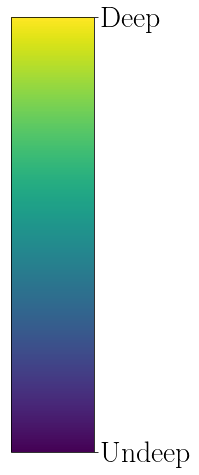

In [128]:
f,ax = plt.subplots(1, figsize = (3,8))
cb1 = matplotlib.colorbar.ColorbarBase(ax, cmap=plt.get_cmap('viridis'), 
                                       ticks = [0,1],
                                       orientation='vertical')
# cb1.set_label('Layer depth', fontsize = 35)
cb1.ax.set_yticklabels(['Undeep','Deep'], fontsize = 30) 

box = cb1.ax.get_position()
cb1.ax.set_position([box.x0, box.y0,
                 box.width*0.5, box.height])

plt.savefig('figures/relative_colorbar.eps',format='eps', dpi=200)